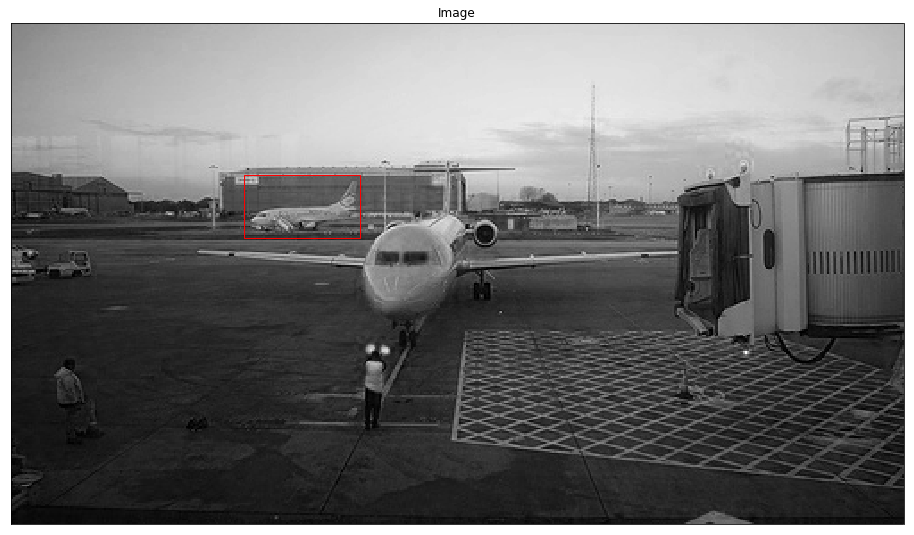

/home/hugo/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


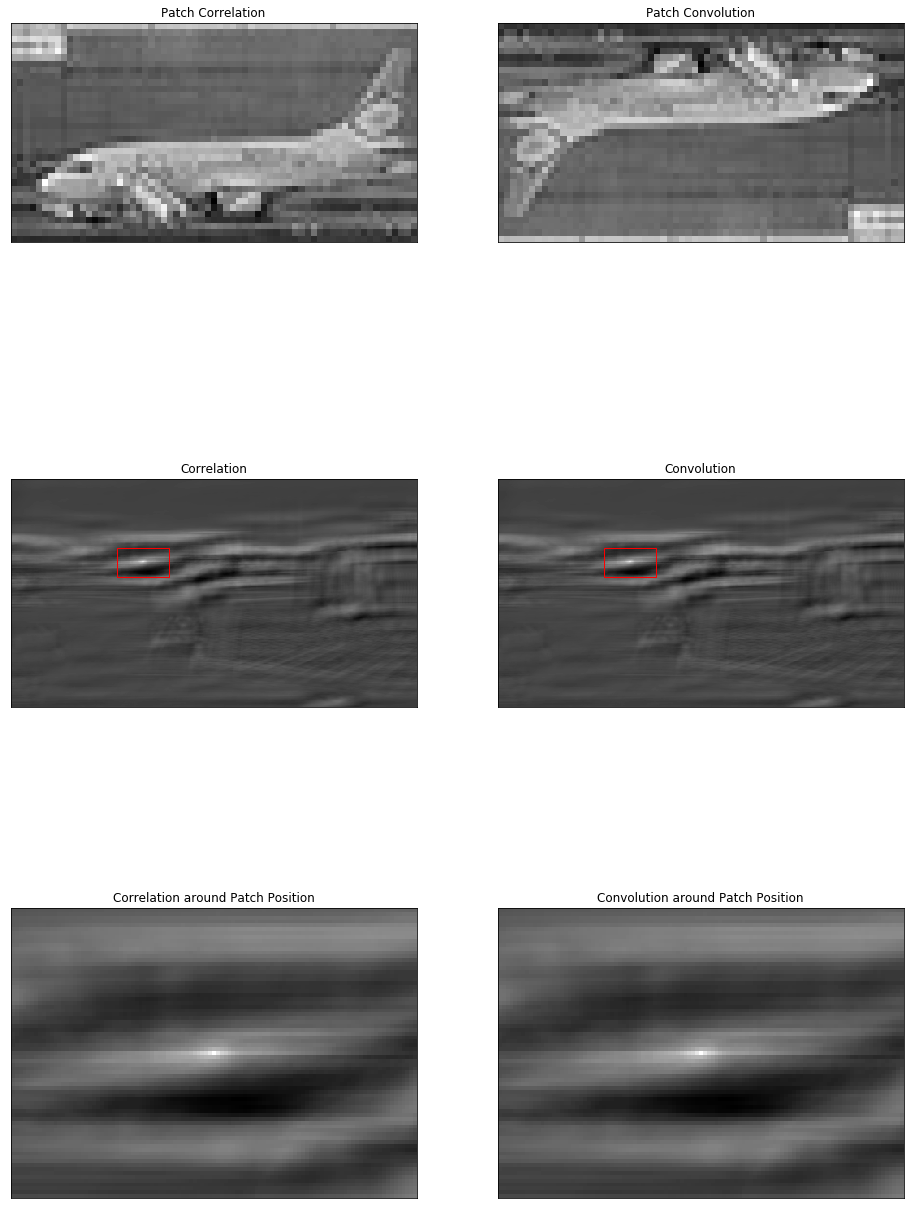

In [20]:
from scipy import signal

from skimage import io

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import numpy as np

%matplotlib inline

# Reading image.
image = io.imread('../../../data/image_2007_000032.jpg')
image = image[:,:,0].astype(np.float)

# Extracting patch from image.
# boundaries = [127, 137, 219, 233]
# boundaries = [200, 210, 280, 290]
# boundaries = [109, 129, 255, 275]
boundaries = [85, 120, 130, 195]
plot_boundaries = [max(boundaries[0] - 20, 0),
                   min(boundaries[1] + 20, image.shape[0]),
                   max(boundaries[2] - 20, 0),
                   min(boundaries[3] + 20, image.shape[1])]

patch_corr = image[boundaries[0]:boundaries[1], boundaries[2]:boundaries[3]]
patch_corr = patch_corr - patch_corr.mean()

# Correlation.
result_corr = signal.correlate2d(image, patch_corr, mode='same', boundary='symm')

# Convolution.
patch_conv = np.fliplr(np.flipud(patch_corr))
result_conv = signal.convolve2d(image, patch_conv, mode='same', boundary='symm')

# Plotting.
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
ax.set_title('Image')
ax.set_xticks([])
ax.set_yticks([])
ax.add_patch(patches.Rectangle((boundaries[2], boundaries[0]),
                               (boundaries[3] - boundaries[2]),
                               (boundaries[1] - boundaries[0]), color='red', fill=False))

plt.show()

fig, ax = plt.subplots(3, 2, figsize=(16, 24))

ax[0, 0].imshow(patch_corr, interpolation='nearest', cmap=plt.cm.gray)
ax[0, 0].set_title('Patch Correlation')
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])

ax[0, 1].imshow(patch_conv, interpolation='nearest', cmap=plt.cm.gray)
ax[0, 1].set_title('Patch Convolution')
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])

ax[1, 0].imshow(result_corr, interpolation='nearest', cmap=plt.cm.gray)
ax[1, 0].set_title('Correlation')
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])
ax[1, 0].add_patch(patches.Rectangle((boundaries[2], boundaries[0]),
                                     (boundaries[3] - boundaries[2]),
                                     (boundaries[1] - boundaries[0]), color='red', fill=False))

ax[1, 1].imshow(result_conv, interpolation='nearest', cmap=plt.cm.gray)
ax[1, 1].set_title('Convolution')
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])
ax[1, 1].add_patch(patches.Rectangle((boundaries[2], boundaries[0]),
                                     (boundaries[3] - boundaries[2]),
                                     (boundaries[1] - boundaries[0]), color='red', fill=False))

ax[2, 0].imshow(result_corr[plot_boundaries[0]:plot_boundaries[1], plot_boundaries[2]:plot_boundaries[3]], interpolation='nearest', cmap=plt.cm.gray)
ax[2, 0].set_title('Correlation around Patch Position')
ax[2, 0].set_xticks([])
ax[2, 0].set_yticks([])

ax[2, 1].imshow(result_conv[plot_boundaries[0]:plot_boundaries[1], plot_boundaries[2]:plot_boundaries[3]], interpolation='nearest', cmap=plt.cm.gray)
ax[2, 1].set_title('Convolution around Patch Position')
ax[2, 1].set_xticks([])
ax[2, 1].set_yticks([])

fig.show()